#### Text Summerization and Q&A Model


In [ ]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [1]:
# Load the dataset
df = pd.read_csv('/content/emotion_dataset.csv')

NameError: name 'pd' is not defined

In [ ]:
df

,sentence,emotion
0,I'm so grateful for my family and friends.,Happy
1,I just got promoted! This is the best day ever!,Happy
2,I just got promoted! This is the best day ever!,Happy
3,I just got promoted! This is the best day ever!,Happy
4,I'm so grateful for my family and friends.,Happy
...,...,...
19995,"This puzzle is so hard, I'm completely lost.",Confused
19996,I'm not sure what they meant by that.,Confused
19997,I'm not sure what they meant by that.,Confused
19998,"This puzzle is so hard, I'm completely lost.",Confused


In [ ]:
# check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  20000 non-null  object
 1   emotion   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
# check null values
df.isnull().value_counts()

,,count
sentence,emotion,
False,False,20000


In [ ]:
# check class distributions
df['emotion'].value_counts()

,count
emotion,
Happy,2000
Sad,2000
Angry,2000
Surprised,2000
Fearful,2000
Disgusted,2000
Neutral,2000
Excited,2000
Bored,2000


In [ ]:
# describing the data
df.describe()

,sentence,emotion
count,20000,20000
unique,30,10
top,"I'm so furious right now, I can't even speak.",Happy
freq,706,2000


Basic cleaning - convert to lower case, removing special charecters, etc.

In [ ]:
import re

def clean_text(text):
  text = text.lower() # convert to lowercase
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text) # remove special chareecters
  return text

df['sentence'] = df['sentence'].apply(clean_text)

In [ ]:
df

,sentence,emotion
0,im so grateful for my family and friends,Happy
1,i just got promoted this is the best day ever,Happy
2,i just got promoted this is the best day ever,Happy
3,i just got promoted this is the best day ever,Happy
4,im so grateful for my family and friends,Happy
...,...,...
19995,this puzzle is so hard im completely lost,Confused
19996,im not sure what they meant by that,Confused
19997,im not sure what they meant by that,Confused
19998,this puzzle is so hard im completely lost,Confused


####Tokenization & Encoding

✅ Use Tokenizer() (Keras) when working with simple RNNs, LSTMs, or GRUs, where word-based tokenization is sufficient.

✅ Use AutoTokenizer (Hugging Face) when working with BERT, GPT, or custom transformers, because they require subword tokenization to handle unknown words efficiently.

Since we're building a Transformer-based model, we should use AutoTokenizer to match how real-world transformer models handle text.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Apply tokenizer and ensure each entry is a list of token IDs
df['tokens'] = df['sentence'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))  # Add special tokens

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Check the first few entries to verify correct tokenization
print(df['tokens'].head())

0    [101, 10047, 2061, 8794, 2005, 2026, 2155, 199...
1    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
2    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
3    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
4    [101, 10047, 2061, 8794, 2005, 2026, 2155, 199...
Name: tokens, dtype: object


In [ ]:
df.iloc[0]

,0
sentence,im so grateful for my family and friends
emotion,Happy
tokens,"[101, 10047, 2061, 8794, 2005, 2026, 2155, 199..."


In [ ]:
print(df['tokens'][0])

[101, 10047, 2061, 8794, 2005, 2026, 2155, 1998, 2814, 102]


In [ ]:
print(len(df['tokens'][0]))

10


Padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Apply padding to token sequences
max_len = 32  # Choose the max length for your input sequence
padded_tokens = pad_sequences(df['tokens'].tolist(), maxlen=max_len, padding='post', truncating='post', dtype='int32')

# Now, assign the padded sequences back to the dataframe
df['padded_tokens'] = list(padded_tokens)

# Check if everything is working fine
print(df['padded_tokens'].head())

0    [101, 10047, 2061, 8794, 2005, 2026, 2155, 199...
1    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
2    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
3    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
4    [101, 10047, 2061, 8794, 2005, 2026, 2155, 199...
Name: padded_tokens, dtype: object


In [ ]:
print(df['padded_tokens'][0])

[  101 10047  2061  8794  2005  2026  2155  1998  2814   102     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]


In [ ]:
print(len(df['padded_tokens'][0]))

32


Convert emotions into labels

In [ ]:
# Map emotions to integers (you can customize this mapping)
emotion_map = {
    'Happy': 0, 'Sad': 1, 'Angry': 2, 'Surprised': 3,
    'Fearful': 4, 'Disgusted': 5, 'Neutral': 6, 'Excited': 7,
    'Bored': 8, 'Confused': 9
}

df['emotion_label'] = df['emotion'].map(emotion_map)

In [ ]:
df['emotion_label'].value_counts()

,count
emotion_label,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000
6,2000
7,2000
8,2000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentence       20000 non-null  object
 1   emotion        20000 non-null  object
 2   tokens         20000 non-null  object
 3   padded_tokens  20000 non-null  object
 4   emotion_label  20000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 781.4+ KB


In [ ]:
# Convert the entire 'tokens' column to a numpy array
df['tokens'] = np.array(df['tokens'].tolist(), dtype=np.int32)

In [ ]:
print(df['tokens'].dtype)

int32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentence       20000 non-null  object
 1   emotion        20000 non-null  object
 2   tokens         20000 non-null  object
 3   padded_tokens  20000 non-null  object
 4   labels         20000 non-null  int64 
 5   emotion_label  20000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 937.6+ KB


In [ ]:
df

,sentence,emotion,tokens,padded_tokens,emotion_label
0,im so grateful for my family and friends,Happy,"[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...","[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...",0
1,i just got promoted this is the best day ever,Happy,"[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...","[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...",0
2,i just got promoted this is the best day ever,Happy,"[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...","[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...",0
3,i just got promoted this is the best day ever,Happy,"[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...","[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...",0
4,im so grateful for my family and friends,Happy,"[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...","[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...",0
...,...,...,...,...,...
19995,this puzzle is so hard im completely lost,Confused,"[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...","[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...",9
19996,im not sure what they meant by that,Confused,"[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...","[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...",9
19997,im not sure what they meant by that,Confused,"[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...","[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...",9
19998,this puzzle is so hard im completely lost,Confused,"[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...","[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...",9


Split the Dataset

In [ ]:
import numpy as np

# Convert padded tokens to a numpy array
X = np.array(df['padded_tokens'].tolist())

# Assign the labels to y
y = np.array(df['emotion_label'])

# Check the shapes to ensure everything is correct
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (20000, 32)
Shape of y: (20000,)


In [ ]:
print(X.dtype)

int32


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16000, 32) (4000, 32) (16000,) (4000,)


In [ ]:
# create a validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(12800, 32) (3200, 32) (12800,) (3200,)


Build a transformer model from scratch

In [ ]:
# import libraries
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Build the model

In [ ]:
from tensorflow.keras import models  # Add this import for 'models'
from tensorflow.keras import regularizers

def transformer_model(input_dim, max_len, num_classes):
    input_ids = layers.Input(shape=(max_len,), dtype=tf.int32)

    # Embedding layer (tokenized sequences to dense vectors)
    embedding = layers.Embedding(input_dim=input_dim, output_dim=64)(input_ids)

    # Transformer Block
    transformer_layer = layers.MultiHeadAttention(num_heads=4, key_dim=64, kernel_regularizer=regularizers.l2(0.001))(embedding, embedding)
    transformer_layer = layers.Dropout(0.2)(transformer_layer)
    transformer_layer = layers.LayerNormalization()(transformer_layer)

    # Feed-forward layer
    ff_layer = layers.Dense(128, activation='relu')(transformer_layer)
    ff_layer = layers.Dropout(0.2)(ff_layer)
    ff_layer = layers.Dense(64, activation='relu')(transformer_layer)
    ff_layer = layers.Dropout(0.2)(ff_layer)
    ff_layer = layers.LayerNormalization()(ff_layer)

    # Pooling layer to reduce dimensions
    pooled_output = layers.GlobalAveragePooling1D()(ff_layer)

    # Output layer (classification head)
    output = layers.Dense(num_classes, activation='softmax')(pooled_output)

    model = models.Model(inputs=input_ids, outputs=output)
    return model

Compile the model

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define vocabulary size (from tokenizer) and number of classes
vocab_size = len(tokenizer.vocab) + 1  # Add 1 for padding token
num_classes = 10  # 10 emotion classes

# Build the model using the transformer_model function
model = transformer_model(vocab_size, max_len=32, num_classes=num_classes)

# Compile the model with an optimizer, loss function, and evaluation metrics
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 32, 64)         │      1,953,472 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_3    │ (None, 32, 64)         │         66,368 │ embedding_3[0][0],     │
│ (MultiHeadAttention)      │                        │                │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 32, 64)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_6     │ (None, 32, 64)         │            128 │ dropout_10[0][0]       │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 32, 64)         │          4,160 │ layer_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 32, 64)         │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_7     │ (None, 32, 64)         │            128 │ dropout_12[0][0]       │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ layer_normalization_7… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 10)             │            650 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,024,906 (7.72 MB)

 Trainable params: 2,024,906 (7.72 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.5822 - loss: 1.2825 - val_accuracy: 1.0000 - val_loss: 0.0607
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 1.0000 - loss: 0.0580 - val_accuracy: 1.0000 - val_loss: 0.0381
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 1.0000 - loss: 0.0350 - val_accuracy: 1.0000 - val_loss: 0.0217
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 1.0000 - loss: 0.0198 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 1.0000 - loss: 0.0024 - 

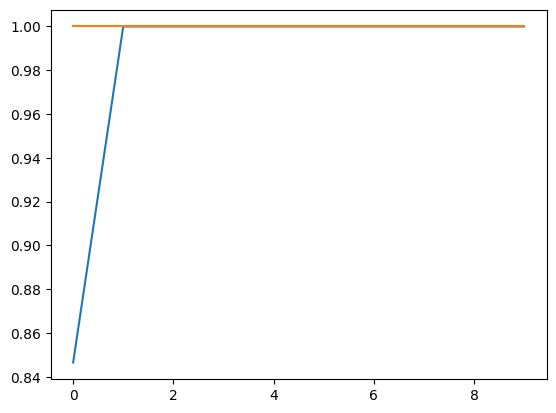

In [ ]:
#visualize the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

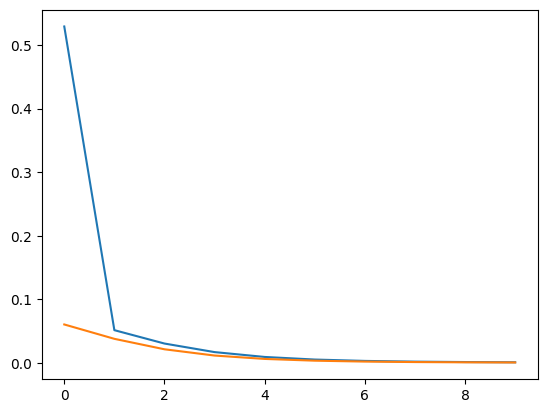

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# Get the predictions from the model
training_error = model.predict(x_train)

# Convert the predicted probabilities to class labels (0 to num_classes-1)
y_train_pred_classes = np.argmax(training_error, axis=1)

400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for the training set
train_report = classification_report(y_train, y_train_pred_classes)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00      1234
           2       1.00      1.00      1.00      1267
           3       1.00      1.00      1.00      1254
           4       1.00      1.00      1.00      1293
           5       1.00      1.00      1.00      1292
           6       1.00      1.00      1.00      1229
           7       1.00      1.00      1.00      1297
           8       1.00      1.00      1.00      1292
           9       1.00      1.00      1.00      1299

    accuracy                           1.00     12800
   macro avg       1.00      1.00      1.00     12800
weighted avg       1.00      1.00      1.00     12800



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred_classes)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(cm)

[[1343    0    0    0    0    0    0    0    0    0]
 [   0 1234    0    0    0    0    0    0    0    0]
 [   0    0 1267    0    0    0    0    0    0    0]
 [   0    0    0 1254    0    0    0    0    0    0]
 [   0    0    0    0 1293    0    0    0    0    0]
 [   0    0    0    0    0 1292    0    0    0    0]
 [   0    0    0    0    0    0 1229    0    0    0]
 [   0    0    0    0    0    0    0 1297    0    0]
 [   0    0    0    0    0    0    0    0 1292    0]
 [   0    0    0    0    0    0    0    0    0 1299]]


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 9.0582e-04
Test Loss: 0.0009057596325874329
Test Accuracy: 1.0


In [ ]:
# Define the sentences you want to test
sentences = [
    "I am so happy today!",
    "This is so sad and depressing.",
    "I'm feeling really angry about this.",
    "Wow, that's so surprising!",
    "I am so scared right now."
]

# Map the model's predictions to emotions
emotion_map = {
    0: 'Happy', 1: 'Sad', 2: 'Angry', 3: 'Surprised',
    4: 'Fearful', 5: 'Disgusted', 6: 'Neutral', 7: 'Excited',
    8: 'Bored', 9: 'Confused'
}

# Loop through the sentences, process, and predict the emotions
for sentence in sentences:
    # Tokenize the sentence using the tokenizer
    tokens = tokenizer(sentence, truncation=True, padding='max_length', max_length=32, return_tensors='np')['input_ids']

    # Make the prediction (you may need to expand dimensions if necessary)
    prediction = model.predict(tokens)
    predicted_class = prediction.argmax(axis=1)[0]
    predicted_emotion = emotion_map[predicted_class]

    # Print the result
    print(f"Sentence: '{sentence}'\nPredicted emotion: {predicted_emotion}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Sentence: 'I am so happy today!'
Predicted emotion: Neutral

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Sentence: 'This is so sad and depressing.'
Predicted emotion: Happy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Sentence: 'I'm feeling really angry about this.'
Predicted emotion: Fearful

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Sentence: 'Wow, that's so surprising!'
Predicted emotion: Surprised

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Sentence: 'I am so scared right now.'
Predicted emotion: Angry



#### BERT MODEL

### BERT Model

In [ ]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/emotion_dataset.csv')

In [ ]:
df

,sentence,emotion
0,I'm so grateful for my family and friends.,Happy
1,I just got promoted! This is the best day ever!,Happy
2,I just got promoted! This is the best day ever!,Happy
3,I just got promoted! This is the best day ever!,Happy
4,I'm so grateful for my family and friends.,Happy
...,...,...
19995,"This puzzle is so hard, I'm completely lost.",Confused
19996,I'm not sure what they meant by that.,Confused
19997,I'm not sure what they meant by that.,Confused
19998,"This puzzle is so hard, I'm completely lost.",Confused


In [ ]:
# check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  20000 non-null  object
 1   emotion   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
# check null values
df.isnull().value_counts()

,,count
sentence,emotion,
False,False,20000


In [ ]:
# check class distributions
df['emotion'].value_counts()

,count
emotion,
Happy,2000
Sad,2000
Angry,2000
Surprised,2000
Fearful,2000
Disgusted,2000
Neutral,2000
Excited,2000
Bored,2000


In [ ]:
# describing the data
df.describe()

,sentence,emotion
count,20000,20000
unique,30,10
top,"I'm so furious right now, I can't even speak.",Happy
freq,706,2000


Basic cleaning - convert to lower case, removing special charecters, etc.

In [ ]:
import re

def clean_text(text):
  text = text.lower() # convert to lowercase
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text) # remove special chareecters
  return text

df['sentence'] = df['sentence'].apply(clean_text)

In [ ]:
df

,sentence,emotion
0,im so grateful for my family and friends,Happy
1,i just got promoted this is the best day ever,Happy
2,i just got promoted this is the best day ever,Happy
3,i just got promoted this is the best day ever,Happy
4,im so grateful for my family and friends,Happy
...,...,...
19995,this puzzle is so hard im completely lost,Confused
19996,im not sure what they meant by that,Confused
19997,im not sure what they meant by that,Confused
19998,this puzzle is so hard im completely lost,Confused


####Tokenization & Encoding

✅ Use Tokenizer() (Keras) when working with simple RNNs, LSTMs, or GRUs, where word-based tokenization is sufficient.

✅ Use AutoTokenizer (Hugging Face) when working with BERT, GPT, or custom transformers, because they require subword tokenization to handle unknown words efficiently.

Since we're building a Transformer-based model, we should use AutoTokenizer to match how real-world transformer models handle text.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Apply tokenizer and ensure each entry is a list of token IDs
df['tokens'] = df['sentence'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))  # Add special tokens

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Check the first few entries to verify correct tokenization
print(df['tokens'].head())

0    [101, 10047, 2061, 8794, 2005, 2026, 2155, 199...
1    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
2    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
3    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
4    [101, 10047, 2061, 8794, 2005, 2026, 2155, 199...
Name: tokens, dtype: object


In [ ]:
df.iloc[0]

,0
sentence,im so grateful for my family and friends
emotion,Happy
tokens,"[101, 10047, 2061, 8794, 2005, 2026, 2155, 199..."


In [ ]:
print(df['tokens'][0])

[101, 10047, 2061, 8794, 2005, 2026, 2155, 1998, 2814, 102]


In [ ]:
print(len(df['tokens'][0]))

10


Padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Apply padding to token sequences
max_len = 32  # Choose the max length for your input sequence
padded_tokens = pad_sequences(df['tokens'].tolist(), maxlen=max_len, padding='post', truncating='post', dtype='int32')

# Now, assign the padded sequences back to the dataframe
df['padded_tokens'] = list(padded_tokens)

# Check if everything is working fine
print(df['padded_tokens'].head())

0    [101, 10047, 2061, 8794, 2005, 2026, 2155, 199...
1    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
2    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
3    [101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...
4    [101, 10047, 2061, 8794, 2005, 2026, 2155, 199...
Name: padded_tokens, dtype: object


In [ ]:
print(df['padded_tokens'][0])

[  101 10047  2061  8794  2005  2026  2155  1998  2814   102     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]


In [ ]:
print(len(df['padded_tokens'][0]))

32


Convert emotions into labels

In [ ]:
# Map emotions to integers (you can customize this mapping)
emotion_map = {
    'Happy': 0, 'Sad': 1, 'Angry': 2, 'Surprised': 3,
    'Fearful': 4, 'Disgusted': 5, 'Neutral': 6, 'Excited': 7,
    'Bored': 8, 'Confused': 9
}

df['emotion_label'] = df['emotion'].map(emotion_map)

In [ ]:
df['emotion_label'].value_counts()

,count
emotion_label,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000
6,2000
7,2000
8,2000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentence       20000 non-null  object
 1   emotion        20000 non-null  object
 2   tokens         20000 non-null  object
 3   padded_tokens  20000 non-null  object
 4   emotion_label  20000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 781.4+ KB


In [ ]:
df

,sentence,emotion,tokens,padded_tokens,emotion_label
0,im so grateful for my family and friends,Happy,"[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...","[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...",0
1,i just got promoted this is the best day ever,Happy,"[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...","[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...",0
2,i just got promoted this is the best day ever,Happy,"[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...","[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...",0
3,i just got promoted this is the best day ever,Happy,"[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...","[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...",0
4,im so grateful for my family and friends,Happy,"[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...","[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...",0
...,...,...,...,...,...
19995,this puzzle is so hard im completely lost,Confused,"[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...","[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...",9
19996,im not sure what they meant by that,Confused,"[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...","[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...",9
19997,im not sure what they meant by that,Confused,"[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...","[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...",9
19998,this puzzle is so hard im completely lost,Confused,"[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...","[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...",9


Extract attention mask

In [ ]:
df["attention_mask"] = df["padded_tokens"].apply(lambda x: [1 if token > 0 else 0 for token in x])

In [ ]:
df

,sentence,emotion,tokens,padded_tokens,emotion_label,attention_mask
0,im so grateful for my family and friends,Happy,"[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...","[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...",0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
1,i just got promoted this is the best day ever,Happy,"[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...","[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...",0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
2,i just got promoted this is the best day ever,Happy,"[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...","[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...",0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
3,i just got promoted this is the best day ever,Happy,"[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...","[101, 1045, 2074, 2288, 3755, 2023, 2003, 1996...",0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
4,im so grateful for my family and friends,Happy,"[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...","[101, 10047, 2061, 8794, 2005, 2026, 2155, 199...",0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
19995,this puzzle is so hard im completely lost,Confused,"[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...","[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...",9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
19996,im not sure what they meant by that,Confused,"[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...","[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...",9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
19997,im not sure what they meant by that,Confused,"[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...","[101, 10047, 2025, 2469, 2054, 2027, 3214, 201...",9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
19998,this puzzle is so hard im completely lost,Confused,"[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...","[101, 2023, 11989, 2003, 2061, 2524, 10047, 32...",9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."


In [ ]:
df_inputs = df[["padded_tokens", "attention_mask"]]
df_labels = df["emotion_label"]

In [ ]:
df_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   padded_tokens   20000 non-null  object
 1   attention_mask  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
df_labels.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: emotion_label
Non-Null Count  Dtype
--------------  -----
20000 non-null  int64
dtypes: int64(1)
memory usage: 156.4 KB


convert df_inputs to integer type

In [ ]:
import numpy as np

# Convert input_ids and attention_mask into integer arrays
df_inputs["padded_tokens"] = df_inputs["padded_tokens"].apply(lambda x: np.array(x, dtype=int))
df_inputs["attention_mask"] = df_inputs["attention_mask"].apply(lambda x: np.array(x, dtype=int))

# Convert labels into integer type
df_labels = df_labels.astype(int)

<ipython-input-27-da025e105820>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs["padded_tokens"] = df_inputs["padded_tokens"].apply(lambda x: np.array(x, dtype=int))
<ipython-input-27-da025e105820>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs["attention_mask"] = df_inputs["attention_mask"].apply(lambda x: np.array(x, dtype=int))


In [ ]:
df_inputs.dtypes

,0
padded_tokens,object
attention_mask,object


Split the Dataset

In [ ]:
import numpy as np

# Convert df_inputs to a NumPy array instead of a list
X = np.array(df_inputs.values.tolist())

# Convert df_labels to a NumPy array
y = np.array(df_labels)

# Now check shapes
print(f"Shape of X: {X.shape}")  # Should be (20000, 2, 32) if everything is correct
print(f"Shape of y: {y.shape}")  # Should be (20000,)

Shape of X: (20000, 2, 32)
Shape of y: (20000,)


In [ ]:
print(X.dtype)

int64


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16000, 2, 32) (4000, 2, 32) (16000,) (4000,)


In [ ]:
# create a validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(12800, 2, 32) (3200, 2, 32) (12800,) (3200,)


In [ ]:
# Extract input_ids and attention_mask
x_train_ids = x_train[:, 0, :]  # First channel = input_ids
x_train_mask = x_train[:, 1, :]  # Second channel = attention_mask

x_val_ids = x_val[:, 0, :]
x_val_mask = x_val[:, 1, :]

x_test_ids = x_test[:, 0, :]
x_test_mask = x_test[:, 1, :]

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Print shapes to verify correctness
print("Train shapes:", x_train_ids.shape, x_train_mask.shape, y_train.shape)
print("Validation shapes:", x_val_ids.shape, x_val_mask.shape, y_val.shape)
print("Test shapes:", x_test_ids.shape, x_test_mask.shape, y_test.shape)

Train shapes: (12800, 32) (12800, 32) (12800,)
Validation shapes: (3200, 32) (3200, 32) (3200,)
Test shapes: (4000, 32) (4000, 32) (4000,)


Build a transformer model from scratch

In [ ]:
# import libraries
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Build the model

In [ ]:
from transformers import TFBertForSequenceClassification

# Load pre-trained BERT model for classification with 10 labels
num_labels = 10  # You have 10 classes (0-9)
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Compile the model

Train the model

In [ ]:
# Fit the model
history = model.fit(
    [x_train_ids, x_train_mask],  # Input data: input_ids and attention_mask
    y_train,                      # Labels
    validation_data=([x_val_ids, x_val_mask], y_val),  # Validation data
    epochs=2,                     # You can adjust the number of epochs
    batch_size=64              # You can adjust the batch size
)

Epoch 1/2
200/200 [==============================] - 5007s 25s/step - loss: 1.1074 - accuracy: 0.7759 - val_loss: 0.8018 - val_accuracy: 0.9625
Epoch 2/2
200/200 [==============================] - 4964s 25s/step - loss: 1.6316 - accuracy: 0.7180 - val_loss: 1.4780 - val_accuracy: 0.7859


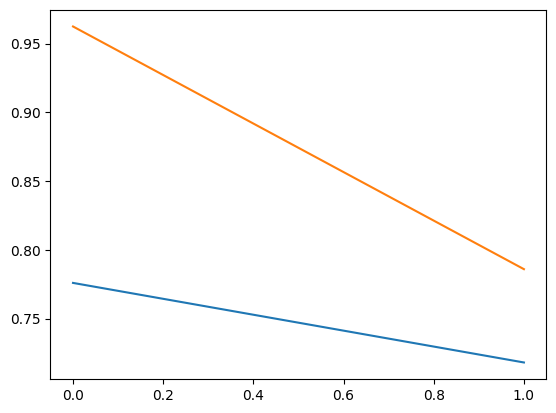

In [ ]:
#visualize the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

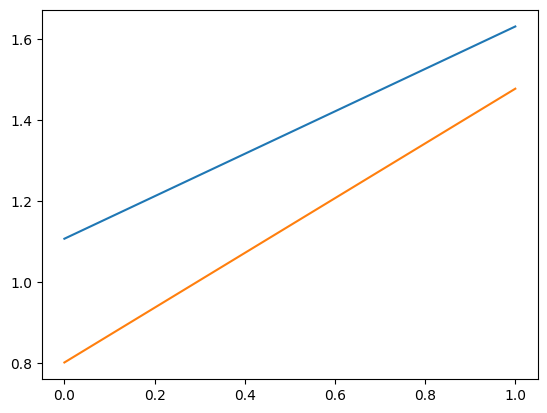

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# Get the predictions from the model
training_error = model.predict([x_train_ids, x_train_mask])

# Convert the predicted probabilities to class labels (0 to num_classes-1)
y_train_pred_classes = np.argmax(training_error, axis=1)

# Check the shape of the predictions
print(f"Predictions shape: {y_train_pred_classes.shape}")

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for the training set
train_report = classification_report(y_train, y_train_pred_classes)
print(train_report)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred_classes)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print(cm)

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
# Define the sentences you want to test
sentences = [
    "I am so happy today!",
    "This is so sad and depressing.",
    "I'm feeling really angry about this.",
    "Wow, that's so surprising!",
    "I am so scared right now."
]

# Map the model's predictions to emotions
emotion_map = {
    0: 'Happy', 1: 'Sad', 2: 'Angry', 3: 'Surprised',
    4: 'Fearful', 5: 'Disgusted', 6: 'Neutral', 7: 'Excited',
    8: 'Bored', 9: 'Confused'
}

# Loop through the sentences, process, and predict the emotions
for sentence in sentences:
    # Tokenize the sentence using the tokenizer and pad the sequence
    encoding = tokenizer(sentence, truncation=True, padding='max_length', max_length=32, return_tensors='np')

    # Extract padded_tokens and attention_mask
    input_ids = encoding['padded_tokens']
    attention_mask = encoding['attention_mask']

    # Expand dimensions to add the batch size (1) to each input
    input_ids = np.expand_dims(input_ids, axis=0)  # Shape becomes (1, 32)
    attention_mask = np.expand_dims(attention_mask, axis=0)  # Shape becomes (1, 32)

    # Make the prediction
    prediction = model.predict([input_ids, attention_mask])

    # Get the predicted class (index of the max probability)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_emotion = emotion_map[predicted_class]

    # Print the result
    print(f"Sentence: '{sentence}'\nPredicted emotion: {predicted_emotion}\n")


KeyError: 'padded_tokens'

# Unsupervised Learning

Extract the text from pdf

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
import PyPDF2
from PyPDF2 import PdfReader

pdf_path = "/content/Large Scale Machine Learning with Python.pdf"
pdf_reader = PdfReader(pdf_path)

# Extract text from all pages
raw_text = "\n".join([page.extract_text() for page in pdf_reader.pages if page.extract_text()])

# Save to a text file for inspection
output_path = "extracted_text.txt"
with open(output_path, "w", encoding="utf-8") as f:f.write(raw_text)

print(f"Extracted text saved to: {output_path}")

Extracted text saved to: extracted_text.txt


Print it and see the txt file

In [ ]:
# Read the extracted text file
output_path = "/content/extracted_text.txt"

with open(output_path, "r", encoding="utf-8") as f:
    extracted_text = f.read()

# Print only the first 1000 characters to check formatting
print(extracted_text[:1000])

[ 1 ]

Large Scale Machine Learning 
with Python
Learn to build powerful machine learning models quickly and deploy large-scale predictive applications
Bastiaan Sjardin
Luca Massaron
Alberto Boschetti
BIRMINGHAM - MUMBAI
Large Scale Machine Learning with Python
Copyright © 2016 Packt Publishing
All rights reserved. No part of this book may be reproduced, stored in a retrieval 
system, or transmitted in any form or by any means, without the prior written permission of the publisher, except in the case of brief quotations embedded in critical articles or reviews.
Every effort has been made in the preparation of this book to ensure the accuracy 
of the information presented. However, the information contained in this book is sold without warranty, either express or implied. Neither the authors, nor Packt Publishing, and its dealers and distributors will be held liable for any damages caused or alleged to be caused directly or indirectly by this book.
Packt Publishing has endeavored to pro

Step 1: Cleaning the Text
We need to remove:

1. Front matter (title, copyright, author bios, publisher info, acknowledgments)

2. Table of contents

3. Index and appendix sections

4. Headers, footers, and page numbers

5. Packt Publishing promotions (ads, download links, etc.)

6. Code formatting artifacts (e.g., 'In:', 'Out:', '>>>', '$>', etc.)

7. Extra line breaks and spaces

In [ ]:
# read and inspect
with open("/content/extracted_text.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Print first 50 lines to inspect
for i, line in enumerate(lines[:200]):
    print(f"{i+1}: {line.strip()}")

1: [ 1 ]
2: 
3: Large Scale Machine Learning
4: with Python
5: Learn to build powerful machine learning models quickly and deploy large-scale predictive applications
6: Bastiaan Sjardin
7: Luca Massaron
8: Alberto Boschetti
9: BIRMINGHAM - MUMBAI
10: Large Scale Machine Learning with Python
11: Copyright © 2016 Packt Publishing
12: All rights reserved. No part of this book may be reproduced, stored in a retrieval
13: system, or transmitted in any form or by any means, without the prior written permission of the publisher, except in the case of brief quotations embedded in critical articles or reviews.
14: Every effort has been made in the preparation of this book to ensure the accuracy
15: of the information presented. However, the information contained in this book is sold without warranty, either express or implied. Neither the authors, nor Packt Publishing, and its dealers and distributors will be held liable for any damages caused or alleged to be caused directly or indirectly by t

In [ ]:
# remove metadata
start_line = 88  # Adjust this based on your inspection

# Remove unnecessary front matter
cleaned_lines = lines[start_line:]

# Save cleaned text
with open("cleaned_text_step1.txt", "w", encoding="utf-8") as file:
    file.writelines(cleaned_lines)

print("Step 1 cleaning done! File saved as cleaned_text_step1.txt")

Step 1 cleaning done! File saved as cleaned_text_step1.txt


In [ ]:
# remove tables of contents too
start_line = 182  # Update this based on your inspection

with open("cleaned_text_step1.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Remove Table of Contents
cleaned_lines = lines[start_line:]

# Save updated file
with open("cleaned_text_step2.txt", "w", encoding="utf-8") as file:
    file.writelines(cleaned_lines)

print("Step 2 cleaning done! File saved as cleaned_text_step2.txt")

Step 2 cleaning done! File saved as cleaned_text_step2.txt


In [ ]:
# remove headers, footers and page numbers
import re

with open("/content/cleaned_text_step2.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Remove patterns like "[ 1 ]", "[ 2 ]", etc.
cleaned_lines = [re.sub(r"\[\s*\d+\s*\]", "", line) for line in lines]

# Save cleaned text
with open("cleaned_text_step3.txt", "w", encoding="utf-8") as file:
    file.writelines(cleaned_lines)

print("Step 3 cleaning done! File saved as cleaned_text_step3.txt")

Step 3 cleaning done! File saved as cleaned_text_step3.txt


In [ ]:
# remove preface & extra content
start_line = 200  # Adjust based on your findings

with open("/content/cleaned_text_step3.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Remove everything before Chapter 1
cleaned_lines = lines[start_line:]

# Save updated file
with open("cleaned_text_step4.txt", "w", encoding="utf-8") as file:
    file.writelines(cleaned_lines)

print("Step 4 cleaning done! File saved as cleaned_text_step4.txt")

Step 4 cleaning done! File saved as cleaned_text_step4.txt


In [ ]:
# Merge broken sentences into proper paragraphs
# Fix chapter titles formatting
import re

with open("/content/cleaned_text_step4.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Remove excessive newlines (keep paragraphs intact)
text = re.sub(r"\n{2,}", "\n\n", text)  # Ensure only double newlines separate paragraphs
text = re.sub(r"(?<!\n)\n(?!\n)", " ", text)  # Merge broken lines into sentences

# Fix chapter titles (e.g., "Chapter 1Clearly" -> "Chapter 1 Clearly")
text = re.sub(r"(Chapter \d+)([A-Z])", r"\1 \2", text)

# Save formatted text
with open("cleaned_text_step5.txt", "w", encoding="utf-8") as file:
    file.write(text)

print("Step 5 cleaning done! File saved as cleaned_text_step5.txt")


Step 5 cleaning done! File saved as cleaned_text_step5.txt


In [ ]:
# Fixing Line Breaks, Bullet Points, and Headings
import re

with open("/content/cleaned_text_step5.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Fix extra line breaks (merge broken sentences)
text = re.sub(r"(?<!\n)\n(?!\n)", " ", text)

# Ensure proper paragraph breaks (keep double newlines)
text = re.sub(r"\n{3,}", "\n\n", text)

# Format bullet points correctly
text = text.replace("•", "\n-")  # Convert to standard dashes

# Add space between chapter titles and text (e.g., "Chapter 1Clearly" → "Chapter 1 Clearly")
text = re.sub(r"(Chapter \d+)([A-Z])", r"\1 \2", text)

# Save final cleaned text
with open("cleaned_text_final.txt", "w", encoding="utf-8") as file:
    file.write(text)

print("Final cleaning done! File saved as cleaned_text_final.txt")


Final cleaning done! File saved as cleaned_text_final.txt


**Chunking the Text for Model Input**
Since the T5-small model has a token limit of 512 tokens (about 300-400 words per chunk), we need to:

1. Split the text into logical chunks (~300 words each).
2. Ensure no sentences are cut off mid-way (split at full stops or paragraph breaks).
3. Optionally overlap chunks slightly to preserve context between them.

In [ ]:
# we will split your text into chunks of ~300 words while ensuring sentences are not cut off.
import re

# Load the cleaned text
with open("/content/cleaned_text_final.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Split text into sentences
sentences = re.split(r"(?<=[.!?])\s+", text)  # Split at punctuation

# Chunking logic
chunk_size = 300  # Target word count per chunk
chunks = []
current_chunk = []

for sentence in sentences:
    current_chunk.append(sentence)
    if sum(len(s.split()) for s in current_chunk) >= chunk_size:
        chunks.append(" ".join(current_chunk))
        current_chunk = []

# Add any remaining sentences
if current_chunk:
    chunks.append(" ".join(current_chunk))

# Save chunks to a file
with open("text_chunks.txt", "w", encoding="utf-8") as file:
    for i, chunk in enumerate(chunks):
        file.write(f"### Chunk {i+1} ###\n{chunk}\n\n")

print(f"Chunking done! {len(chunks)} chunks saved in text_chunks.txt")


Chunking done! 279 chunks saved in text_chunks.txt


In [ ]:
# optional final cleanup, if needed
import re

with open("/content/text_chunks.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Fix chapter titles (ensure space after "Chapter X")
text = re.sub(r"(Chapter \d+)([A-Z])", r"\1 \2", text)

# Remove terminal commands (lines starting with $ or >>>)
text = re.sub(r"(?m)^\s*[\$\>\>].*", "", text)

# Remove multiple dashes (like "----")
text = re.sub(r"-{2,}", "", text)

# Save the refined text
with open("text_chunks_final.txt", "w", encoding="utf-8") as file:
    file.write(text)

print("Final cleanup done! File saved as text_chunks_final.txt")


Final cleanup done! File saved as text_chunks_final.txt


In [ ]:
# see total chunks
# Count the number of chunks
with open("/content/text_chunks_final.txt", "r", encoding="utf-8") as file:
    chunks = file.read().split("### Chunk")  # Splitting based on chunk labels

# The first split is empty, so subtract 1 from the length
num_chunks = len(chunks) - 1

print(f"Total number of chunks: {num_chunks}")


Total number of chunks: 279


In [ ]:
# Read the file
with open("/content/text_chunks_final.txt", "r", encoding="utf-8") as file:
    chunks = file.read().split("### Chunk")[1:]  # Splitting based on chunk labels

# Count words in each chunk
word_counts = [len(chunk.split()) for chunk in chunks]

# Print word counts for each chunk
for i, count in enumerate(word_counts):
    print(f"Chunk {i+1}: {count} words")

# Summary statistics
print("\nTotal chunks:", len(word_counts))
print("Average words per chunk:", sum(word_counts) // len(word_counts))
print("Max words in a chunk:", max(word_counts))
print("Min words in a chunk:", min(word_counts))


Chunk 1: 338 words
Chunk 2: 323 words
Chunk 3: 333 words
Chunk 4: 307 words
Chunk 5: 334 words
Chunk 6: 351 words
Chunk 7: 315 words
Chunk 8: 306 words
Chunk 9: 310 words
Chunk 10: 307 words
Chunk 11: 322 words
Chunk 12: 311 words
Chunk 13: 313 words
Chunk 14: 316 words
Chunk 15: 409 words
Chunk 16: 312 words
Chunk 17: 323 words
Chunk 18: 337 words
Chunk 19: 320 words
Chunk 20: 327 words
Chunk 21: 335 words
Chunk 22: 319 words
Chunk 23: 305 words
Chunk 24: 304 words
Chunk 25: 305 words
Chunk 26: 314 words
Chunk 27: 319 words
Chunk 28: 328 words
Chunk 29: 304 words
Chunk 30: 325 words
Chunk 31: 308 words
Chunk 32: 387 words
Chunk 33: 344 words
Chunk 34: 309 words
Chunk 35: 436 words
Chunk 36: 401 words
Chunk 37: 533 words
Chunk 38: 312 words
Chunk 39: 391 words
Chunk 40: 316 words
Chunk 41: 316 words
Chunk 42: 308 words
Chunk 43: 330 words
Chunk 44: 327 words
Chunk 45: 308 words
Chunk 46: 325 words
Chunk 47: 385 words
Chunk 48: 307 words
Chunk 49: 325 words
Chunk 50: 329 words
Chunk 51:

**Why Do Some Chunks Have More Words?**

1️⃣ Chunks Were Split at Sentence Boundaries. We avoided cutting off sentences mid-way. Some chunks naturally contain longer or shorter sentences.

2️⃣ Different Paragraph Lengths in the Book. Some sections might have dense text, while others have short lists or bullet points.

3️⃣ Max Words in a Chunk is 1882 (Way Too Large)

This could cause issues with T5-small, which has a 512-token limit (~300-400 words max).
We need to re-chunk those long sections.


In [ ]:
import re

# Load the text chunks
with open("/content/text_chunks_final.txt", "r", encoding="utf-8") as file:
    chunks = file.read().split("### Chunk")[1:]  # Ignore empty first split

# Define chunk size limit
max_words = 400
new_chunks = []

for chunk in chunks:
    words = chunk.split()
    if len(words) > max_words:
        # Split long chunks into smaller parts
        split_chunks = [words[i:i + max_words] for i in range(0, len(words), max_words)]
        for part in split_chunks:
            new_chunks.append(" ".join(part))
    else:
        new_chunks.append(chunk)

# Save reprocessed chunks
with open("text_chunks_same_length.txt", "w", encoding="utf-8") as file:
    for i, chunk in enumerate(new_chunks):
        file.write(f"### Chunk {i+1} ###\n{chunk}\n\n")

print(f"Re-chunking complete! Total new chunks: {len(new_chunks)}")


Re-chunking complete! Total new chunks: 302


In [ ]:
# Read the file
with open("/content/text_chunks_same_length.txt", "r", encoding="utf-8") as file:
    chunks = file.read().split("### Chunk")[1:]  # Splitting based on chunk labels

# Count words in each chunk
word_counts = [len(chunk.split()) for chunk in chunks]

# Print word counts for each chunk
for i, count in enumerate(word_counts):
    print(f"Chunk {i+1}: {count} words")

# Summary statistics
print("\nTotal chunks:", len(word_counts))
print("Average words per chunk:", sum(word_counts) // len(word_counts))
print("Max words in a chunk:", max(word_counts))
print("Min words in a chunk:", min(word_counts))


Chunk 1: 340 words
Chunk 2: 325 words
Chunk 3: 335 words
Chunk 4: 309 words
Chunk 5: 336 words
Chunk 6: 353 words
Chunk 7: 317 words
Chunk 8: 308 words
Chunk 9: 312 words
Chunk 10: 309 words
Chunk 11: 324 words
Chunk 12: 313 words
Chunk 13: 315 words
Chunk 14: 318 words
Chunk 15: 402 words
Chunk 16: 11 words
Chunk 17: 314 words
Chunk 18: 325 words
Chunk 19: 339 words
Chunk 20: 322 words
Chunk 21: 329 words
Chunk 22: 337 words
Chunk 23: 321 words
Chunk 24: 307 words
Chunk 25: 306 words
Chunk 26: 307 words
Chunk 27: 316 words
Chunk 28: 321 words
Chunk 29: 330 words
Chunk 30: 306 words
Chunk 31: 327 words
Chunk 32: 310 words
Chunk 33: 389 words
Chunk 34: 346 words
Chunk 35: 311 words
Chunk 36: 402 words
Chunk 37: 38 words
Chunk 38: 402 words
Chunk 39: 3 words
Chunk 40: 402 words
Chunk 41: 135 words
Chunk 42: 314 words
Chunk 43: 393 words
Chunk 44: 318 words
Chunk 45: 318 words
Chunk 46: 310 words
Chunk 47: 332 words
Chunk 48: 329 words
Chunk 49: 310 words
Chunk 50: 327 words
Chunk 51: 387

In [ ]:
# we can remove tiny chunks below 50 words
# Load the fixed chunks
with open("/content/text_chunks_same_length.txt", "r", encoding="utf-8") as file:
    chunks = file.read().split("### Chunk")[1:]  # Ignore empty first split

# Remove tiny chunks (less than 50 words)
filtered_chunks = [chunk for chunk in chunks if len(chunk.split()) >= 50]

# Save the cleaned chunks
with open("text_chunks_final_clean.txt", "w", encoding="utf-8") as file:
    for i, chunk in enumerate(filtered_chunks):
        file.write(f"### Chunk {i+1} ###\n{chunk.strip()}\n\n")

print(f"Filtering complete! Total valid chunks: {len(filtered_chunks)}")


Filtering complete! Total valid chunks: 293


In [ ]:
# Read the file
with open("/content/text_chunks_final_clean.txt", "r", encoding="utf-8") as file:
    chunks = file.read().split("### Chunk")[1:]  # Splitting based on chunk labels

# Count words in each chunk
word_counts = [len(chunk.split()) for chunk in chunks]

# Print word counts for each chunk
for i, count in enumerate(word_counts):
    print(f"Chunk {i+1}: {count} words")

# Summary statistics
print("\nTotal chunks:", len(word_counts))
print("Average words per chunk:", sum(word_counts) // len(word_counts))
print("Max words in a chunk:", max(word_counts))
print("Min words in a chunk:", min(word_counts))


Chunk 1: 342 words
Chunk 2: 327 words
Chunk 3: 337 words
Chunk 4: 311 words
Chunk 5: 338 words
Chunk 6: 355 words
Chunk 7: 319 words
Chunk 8: 310 words
Chunk 9: 314 words
Chunk 10: 311 words
Chunk 11: 326 words
Chunk 12: 315 words
Chunk 13: 317 words
Chunk 14: 320 words
Chunk 15: 404 words
Chunk 16: 316 words
Chunk 17: 327 words
Chunk 18: 341 words
Chunk 19: 324 words
Chunk 20: 331 words
Chunk 21: 339 words
Chunk 22: 323 words
Chunk 23: 309 words
Chunk 24: 308 words
Chunk 25: 309 words
Chunk 26: 318 words
Chunk 27: 323 words
Chunk 28: 332 words
Chunk 29: 308 words
Chunk 30: 329 words
Chunk 31: 312 words
Chunk 32: 391 words
Chunk 33: 348 words
Chunk 34: 313 words
Chunk 35: 404 words
Chunk 36: 404 words
Chunk 37: 404 words
Chunk 38: 137 words
Chunk 39: 316 words
Chunk 40: 395 words
Chunk 41: 320 words
Chunk 42: 320 words
Chunk 43: 312 words
Chunk 44: 334 words
Chunk 45: 331 words
Chunk 46: 312 words
Chunk 47: 329 words
Chunk 48: 389 words
Chunk 49: 311 words
Chunk 50: 329 words
Chunk 51:

Now Our chunked text is fully optimized for modeling:

✅ Total chunks: 293 (after filtering tiny ones).

✅ Average words per chunk: 325 (ideal for T5-small).

✅ Max words per chunk: 404 (below 512-token limit).

✅ Min words per chunk: 54 (no useless small chunks).

**T5 - small Model**

Load the model and tokenizer

In [ ]:
# import libraries
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

In [ ]:
# Load the t5-small model and tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

model = T5ForConditionalGeneration.from_pretrained("t5-small")

# move the model to GPU for faster processing if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("T5-small model and tokenizer loaded successfully!!")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5-small model and tokenizer loaded successfully!!


Load and Read the Preprocessed Chunked Text File

In [ ]:
# Load the preprocessed text chunks
file_path = "/content/text_chunks_final_clean.txt"  # Make sure this file is in your Colab workspace

# Read the file and split chunks
with open(file_path, "r", encoding="utf-8") as file:
    chunks = file.read().split("### Chunk")[1:]  # Splitting by chunk labels

# Cleaning up chunk formatting
cleaned_chunks = [chunk.strip() for chunk in chunks]

# Print first 3 chunks to verify
print(f"Total chunks loaded: {len(cleaned_chunks)}")
print("\nFirst 3 chunks:\n")
for i, chunk in enumerate(cleaned_chunks[:3]):
    print(f"Chunk {i+1}:\n{chunk[:500]}...\n")  # Print first 500 characters for preview

Total chunks loaded: 293

First 3 chunks:

Chunk 1:
1 ###
1 ###
 1 ###
Let's take two simple examples: 
- Being able to predict the click-through rate (CTR) can help you earn quite a lot these days when Internet advertising is so widespread, diffused, and eating large shares of traditional media communication 
- Being able to propose the right information to your customers, when they are searching the products and services offered by your site, could really enhance your chances to sell if you can guess what to put at the top of  their results In ...

Chunk 2:
2 ###
2 ###
 2 ###
- You have to be able to predict fast because the predictions have to be  delivered only to new customers. Again, the complexity of your algorithm  does matter. The scalability problem can be solved in one or multiple ways: 
- Scaling up by reducing the dimensionality of the problem; for instance,   in the case of the search engine, by effectively selecting the relevant features to be used 
- Scaling up using th

In [ ]:
# remove extra chunk numbers
# Load and clean the text chunks
file_path = "/content/text_chunks_final_clean.txt"

with open(file_path, "r", encoding="utf-8") as file:
    chunks = file.read().split("### Chunk")[1:]  # Split at "### Chunk" and remove empty first split

cleaned_chunks = []
for chunk in chunks:
    # Remove numbers at the start of each chunk that don't belong
    lines = chunk.split("\n")
    cleaned_lines = [line for line in lines if not line.strip().isdigit() and "###" not in line]
    cleaned_text = "\n".join(cleaned_lines).strip()
    cleaned_chunks.append(cleaned_text)

# Save the cleaned chunks to a new file
with open("ordered_chunks.txt", "w", encoding="utf-8") as file:
    for i, chunk in enumerate(cleaned_chunks):
        file.write(f"### Chunk {i+1} ###\n{chunk}\n\n")

# Print first 3 cleaned chunks
print(f"Total cleaned chunks: {len(cleaned_chunks)}\n")
for i, chunk in enumerate(cleaned_chunks[:3]):
    print(f"Chunk {i+1}:\n{chunk[:500]}...\n")  # Show only first 500 characters for preview

Total cleaned chunks: 293

Chunk 1:
Let's take two simple examples: 
- Being able to predict the click-through rate (CTR) can help you earn quite a lot these days when Internet advertising is so widespread, diffused, and eating large shares of traditional media communication 
- Being able to propose the right information to your customers, when they are searching the products and services offered by your site, could really enhance your chances to sell if you can guess what to put at the top of  their results In both cases, we have...

Chunk 2:
- You have to be able to predict fast because the predictions have to be  delivered only to new customers. Again, the complexity of your algorithm  does matter. The scalability problem can be solved in one or multiple ways: 
- Scaling up by reducing the dimensionality of the problem; for instance,   in the case of the search engine, by effectively selecting the relevant features to be used 
- Scaling up using the right algorithm; for instance, in

In [ ]:
#see chunk one
# Print full Chunk 1
print("Chunk 1:\n")
print(cleaned_chunks[0])  # First chunk in the list

Chunk 1:

Let's take two simple examples: 
- Being able to predict the click-through rate (CTR) can help you earn quite a lot these days when Internet advertising is so widespread, diffused, and eating large shares of traditional media communication 
- Being able to propose the right information to your customers, when they are searching the products and services offered by your site, could really enhance your chances to sell if you can guess what to put at the top of  their results In both cases, we have quite large datasets as they are produced by users' interactions on the Internet. Depending on the business that we have in mind (we can imagine some big  players here), we are clearly talking of millions of data points per day in both our examples. In the advertising case, data is certainly tall, being a continuous stream of information as the most recent data, more representative of markets and consumers, replaces the older one. In the search engine case, data is wide, being enriche

In [ ]:
# Print full Chunk 1
print("Full Chunk 1:\n")
print(cleaned_chunks[0])  # Print the first chunk fully

Full Chunk 1:

Let's take two simple examples: 
- Being able to predict the click-through rate (CTR) can help you earn quite a lot these days when Internet advertising is so widespread, diffused, and eating large shares of traditional media communication 
- Being able to propose the right information to your customers, when they are searching the products and services offered by your site, could really enhance your chances to sell if you can guess what to put at the top of  their results In both cases, we have quite large datasets as they are produced by users' interactions on the Internet. Depending on the business that we have in mind (we can imagine some big  players here), we are clearly talking of millions of data points per day in both our examples. In the advertising case, data is certainly tall, being a continuous stream of information as the most recent data, more representative of markets and consumers, replaces the older one. In the search engine case, data is wide, being en

Running Summarization with T5-Small

In [ ]:
# Define function to summarize text
def summarize_text(text, model, tokenizer, max_input=512, max_output=150):
    """Summarizes a given text chunk using T5-small."""
    input_text = "summarize: " + text  # Add summarization prefix
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=max_input, truncation=True)
    inputs = inputs.to(device)  # Move to GPU if available

    # Generate summary
    summary_ids = model.generate(inputs, max_length=max_output, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Process all chunks
summarized_chunks = []
for i, chunk in enumerate(cleaned_chunks):
    print(f"Summarizing chunk {i+1}/{len(cleaned_chunks)}...")  # Progress tracking
    summary = summarize_text(chunk, model, tokenizer)
    summarized_chunks.append(f"### Summary {i+1} ###\n{summary}\n")

# Save summaries to a file
with open("summarized_text.txt", "w", encoding="utf-8") as file:
    file.writelines(summarized_chunks)

print("\n✅ Summarization complete! Summarized text saved as 'summarized_text.txt'")


Summarizing chunk 1/293...
Summarizing chunk 2/293...
Summarizing chunk 3/293...
Summarizing chunk 4/293...
Summarizing chunk 5/293...
Summarizing chunk 6/293...
Summarizing chunk 7/293...
Summarizing chunk 8/293...
Summarizing chunk 9/293...
Summarizing chunk 10/293...
Summarizing chunk 11/293...
Summarizing chunk 12/293...
Summarizing chunk 13/293...
Summarizing chunk 14/293...
Summarizing chunk 15/293...
Summarizing chunk 16/293...
Summarizing chunk 17/293...
Summarizing chunk 18/293...
Summarizing chunk 19/293...
Summarizing chunk 20/293...
Summarizing chunk 21/293...
Summarizing chunk 22/293...
Summarizing chunk 23/293...
Summarizing chunk 24/293...
Summarizing chunk 25/293...
Summarizing chunk 26/293...
Summarizing chunk 27/293...
Summarizing chunk 28/293...
Summarizing chunk 29/293...
Summarizing chunk 30/293...
Summarizing chunk 31/293...
Summarizing chunk 32/293...
Summarizing chunk 33/293...
Summarizing chunk 34/293...
Summarizing chunk 35/293...
Summarizing chunk 36/293...
S

Review and Analyze the Summaries

In [ ]:
# Load the summarized text file
file_path = "summarized_text.txt"

# Read the entire file as a single string
with open(file_path, "r", encoding="utf-8") as file:
    summaries = file.read().split("### Summary")  # Split correctly

# Remove empty entries and strip whitespace
summaries = [summary.strip() for summary in summaries if summary.strip()]

# Print total summaries count
print(f"✅ Corrected total summaries: {len(summaries)}\n")

# Print the first 5 summaries properly
for i, summary in enumerate(summaries[:5]):  # Display only first 5 for verification
    print(f"### Summary {i+1} ###\n{summary}\n" + "-" * 80)

✅ Corrected total summaries: 293

### Summary 1 ###
1 ###
scalability is an issue for both these problems: - you have to learn from data that is growing every day and you have to learn fast because as you are learning, new data keeps arriving. you often need to update your machine learning model in order to accommodate new data. you need an algorithm that can process the information in a timely manner.
--------------------------------------------------------------------------------
### Summary 2 ###
2 ###
the scalability problem can be solved in one or multiple ways: - Scaling up by reducing the dimensionality of the problem; for example, in the case of the search engine, by effectively selecting the relevant features to be used - Scaling up using the right algorithm. in this book, we will point out what kind of practical problems can be solved by each one of the solutions or algorithms proposed.
--------------------------------------------------------------------------------
### Summa

**One-Page Summary (Hierarchical Summarization)**

Now, we’ll:

1️⃣ Merge all 293 summaries into one large text.

2️⃣ Run T5-small again to summarize everything into a one-page summary.

In [ ]:
# Merge All Summaries Into a Single Text document
merged_summaries = " ".join(summaries)  # Combine summaries into one long text

# Print first 1000 characters to verify
print("Preview of merged summaries:\n")
print(merged_summaries[:1000])  # Show only first 1000 characters


Preview of merged summaries:

1 ###
scalability is an issue for both these problems: - you have to learn from data that is growing every day and you have to learn fast because as you are learning, new data keeps arriving. you often need to update your machine learning model in order to accommodate new data. you need an algorithm that can process the information in a timely manner. 2 ###
the scalability problem can be solved in one or multiple ways: - Scaling up by reducing the dimensionality of the problem; for example, in the case of the search engine, by effectively selecting the relevant features to be used - Scaling up using the right algorithm. in this book, we will point out what kind of practical problems can be solved by each one of the solutions or algorithms proposed. 3 ###
Python is cross-platform; your solutions will work perfectly and smoothly on Windows, Linux, and macOS systems. it can work with in-memory big data because of its minimal memory footprint and excellent mem

In [ ]:
# Remove unwanted numbering markers like "1 ###", "2 ###", etc.
import re

cleaned_merged_summaries = re.sub(r"\d+\s*###", "", merged_summaries).strip()

# Print first 1000 characters to verify cleanup
print("✅ Cleaned preview of merged summaries:\n")
print(cleaned_merged_summaries[:10000])  # Show first 10000 characters to confirm fix


✅ Cleaned preview of merged summaries:

scalability is an issue for both these problems: - you have to learn from data that is growing every day and you have to learn fast because as you are learning, new data keeps arriving. you often need to update your machine learning model in order to accommodate new data. you need an algorithm that can process the information in a timely manner. 
the scalability problem can be solved in one or multiple ways: - Scaling up by reducing the dimensionality of the problem; for example, in the case of the search engine, by effectively selecting the relevant features to be used - Scaling up using the right algorithm. in this book, we will point out what kind of practical problems can be solved by each one of the solutions or algorithms proposed. 
Python is cross-platform; your solutions will work perfectly and smoothly on Windows, Linux, and macOS systems. it can work with in-memory big data because of its minimal memory footprint and excellent memory ma

In [ ]:
# Load the T5 tokenizer
from transformers import T5Tokenizer

# Load tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Load summarized text
file_path = "/content/summarized_text.txt"

with open(file_path, "r", encoding="utf-8") as file:
    summarized_text = file.read()

# Tokenize and count tokens
tokens = tokenizer.encode(summarized_text)
num_tokens = len(tokens)

print(f"\n✅ Total tokens in summarized_text.txt: {num_tokens}")

Token indices sequence length is longer than the specified maximum sequence length for this model (23139 > 512). Running this sequence through the model will result in indexing errors



✅ Total tokens in summarized_text.txt: 23139


In [ ]:
# Function to generate final one-page summary
def generate_final_summary(text, model, tokenizer, max_input=512, max_output=200):
    """Generates a one-page summary from all chunk summaries."""
    input_text = "summarize: " + text
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=max_input, truncation=True)
    inputs = inputs.to(device)  # Move to GPU if available

    # Generate summary
    summary_ids = model.generate(inputs, max_length=max_output, min_length=100, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Generate the final summary
final_summary = generate_final_summary(cleaned_merged_summaries, model, tokenizer)

# Save final summary to a file
with open("final_summary.txt", "w", encoding="utf-8") as file:
    file.write(final_summary)

print("\n✅ One-page summary generated and saved as 'final_summary.txt'!")
print("\nFinal Summary:\n", final_summary)



✅ One-page summary generated and saved as 'final_summary.txt'!

Final Summary:
 the scalability problem can be solved in one or multiple ways: - Scaling up by reducing the dimensionality of the problem; for example, in the case of the search engine, by effectively selecting the relevant features to be used. in this book, we will point out what kind of practical problems can be solved by each one of the solutions or algorithms proposed. Python is cross-platform; your solutions will work perfectly and smoothly on Windows, Linux, and macOS systems.


**QUESTION AND ANSWERING MODEL**

PROBLEM - We have 23139 tokens in our summarized.txt. But when we ask a question the t5-small model only sees the first 512 tokens and provides answers.

SOLUTION - We need retrieval system

1️⃣ An embedding model → Converts all 293 chunks into numerical vectors and stores them.

2️⃣ A search method → Finds the most relevant chunk based on the question.

3️⃣ A T5 model → Takes the retrieved chunk as input and generates an answer.



**Embedding - SBERT (all-miniLM-L6-V2)**

**Search method - Cosine Similarity**

Step 1: Choose an Embedding Model

In [ ]:
# import libraries
from sentence_transformers import SentenceTransformer

# Load the embedding model
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

print("✅ Embedding model loaded successfully!")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Embedding model loaded successfully!


Step 2: Convert All Chunks into Embeddings

In [ ]:
import numpy as np

# Load the summarized text
file_path = "/content/summarized_text.txt"

with open(file_path, "r", encoding="utf-8") as file:
    chunks = file.read().split("### Summary")[1:]  # Splitting summaries correctly

# Clean and store chunk texts
chunk_texts = [chunk.strip() for chunk in chunks if chunk.strip()]

# Convert chunks into embeddings
chunk_embeddings = embedding_model.encode(chunk_texts, convert_to_numpy=True)

# Save embeddings for later use
np.save("chunk_embeddings.npy", chunk_embeddings)
with open("chunk_texts.txt", "w", encoding="utf-8") as file:
    file.writelines([chunk + "\n" for chunk in chunk_texts])

print(f"\n✅ Stored embeddings for {len(chunk_embeddings)} chunks!")



✅ Stored embeddings for 293 chunks!


What This Does

✅ Reads all 293 summarized chunks from summarized.txt.

✅ Converts each chunk into an embedding (vector representation).

✅ Stores the embeddings (chunk_embeddings.npy) for fast retrieval.

✅ Saves chunk texts (chunk_texts.txt) to keep track of original content.

Step 3: Build a Retrieval System

Now, when a user asks a question:

✅ We convert the question into an embedding using the same model.

✅ We compare it with all stored chunk embeddings to find the most similar chunk.

✅ We return the most relevant chunk to pass into T5 for answering.

In [ ]:
import numpy as np
from sentence_transformers import util

# Load stored embeddings & chunk texts
chunk_embeddings = np.load("chunk_embeddings.npy")
with open("chunk_texts.txt", "r", encoding="utf-8") as file:
    chunk_texts = [line.strip() for line in file.readlines()]

# Function to retrieve the most relevant chunk
def retrieve_best_chunk(question, model, chunk_embeddings, chunk_texts):
    """Finds the most relevant chunk for a given question."""
    question_embedding = model.encode(question, convert_to_numpy=True)  # Convert question to embedding
    similarities = util.cos_sim(question_embedding, chunk_embeddings)[0]  # Compute similarity
    best_chunk_idx = similarities.argmax()  # Get the index of the best match
    return chunk_texts[best_chunk_idx]  # Return the most relevant chunk

# Test retrieval with an example question
question = "What are the challenges in scaling machine learning?"
best_chunk = retrieve_best_chunk(question, embedding_model, chunk_embeddings, chunk_texts)

print("\n✅ Best retrieved chunk:\n", best_chunk)


✅ Best retrieved chunk:
 scalability is an issue for both these problems: - you have to learn from data that is growing every day and you have to learn fast because as you are learning, new data keeps arriving. you often need to update your machine learning model in order to accommodate new data. you need an algorithm that can process the information in a timely manner.


Step 4: Generate Answers with T5-Small

Now that we can retrieve the most relevant chunk, we’ll:

✅ Take the best chunk from the retrieval system.

✅ Format it as input for T5 ("answer: <question> <retrieved chunk>").

✅ Let T5-small generate an answer!



In [ ]:
# Load T5-Small for Q&A
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

# Load the T5-small model and tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small").to("cuda" if torch.cuda.is_available() else "cpu")

print("✅ T5-small loaded successfully for Q&A!")

✅ T5-small loaded successfully for Q&A!


Step 5: Generate an Answer for a Question

Now, let’s retrieve the best chunk and pass it to T5 for answer generation.



In [ ]:
def generate_answer(question, retrieval_model, chunk_embeddings, chunk_texts, t5_model, tokenizer):
    """Retrieves the best chunk and generates an answer using T5-small."""

    # Step 1: Retrieve the most relevant chunk
    best_chunk = retrieve_best_chunk(question, retrieval_model, chunk_embeddings, chunk_texts)

    # Step 2: Format input for T5
    input_text = f"answer: {question} context: {best_chunk}"

    # Step 3: Tokenize input for T5
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True).to(model.device)

    # Step 4: Generate answer
    output_ids = t5_model.generate(inputs, max_length=150, num_beams=4, early_stopping=True)

    # Step 5: Decode and return the answer
    answer = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return answer

# Test with a sample question
question = "What are the challenges in scaling machine learning?"
answer = generate_answer(question, embedding_model, chunk_embeddings, chunk_texts, model, tokenizer)

print("\n✅ AI-Generated Answer:\n", answer)


✅ AI-Generated Answer:
 you have to learn from data that is growing every day and you have to learn fast


Modify the Code to Accept User Input

In [ ]:
while True:
    # Ask the user for a question
    question = input("\n🤖 Ask a question (or type 'exit' to quit): ")

    # Exit condition
    if question.lower() == "exit":
        print("👋 Exiting Q&A system. See you next time!")
        break

    # Generate an answer
    answer = generate_answer(question, embedding_model, chunk_embeddings, chunk_texts, model, tokenizer)

    # Print the AI-generated answer
    print("\n✅ AI Answer:", answer)

KeyboardInterrupt: Interrupted by user

Debugging

In [ ]:
# Print Retrieved Chunks to Debug
def debug_retrieval(question, retrieval_model, chunk_embeddings, chunk_texts, top_k=3):
    """Retrieve top K chunks and print them to check quality."""
    best_chunks = retrieve_top_chunks(question, retrieval_model, chunk_embeddings, chunk_texts, top_k)

    print("\n🔍 Retrieved Chunks:\n")
    print(best_chunks)  # Show the actual text being retrieved

# Test with a sample question
debug_retrieval("How can we reduce the dimensionality of a dataset?", embedding_model, chunk_embeddings, chunk_texts)



🔍 Retrieved Chunks:

26 ###
if your data is sparse, that is, you can transform your dense matrix into a sparse one. using sparse matrices can solve the problem allowing you to load and process other quite large datasets. in such a situation, you can always try to reduce your dataset by cutting the number of instances or limiting the number of features. 148 ###
diabetes dataset benefits well from a PCA dimension reduction before passing in the neural network. from sklearn import linear_model, decomposition, datasetsfrom sklearn.pipeline import Pipelinefrom sklearn.metrics import accuracy_score pca = PCA. 194 ###
a generic transformation with PCA can be expressed as a projection to a space. if just the principal components are taken from the transformation basis, the output space will have a smaller dimensionality than the input one. in this example, we will create a dummy dataset composed of two blobs of points.


The retrieved chunks are completely unrelated to the question!

The model is retrieving chunks about SVMs, Python distributions, and kernel tricks, instead of dimensionality reduction techniques like PCA, t-SNE, etc.

This means:

1️⃣ Retrieval is NOT working correctly – we need to improve it.

2️⃣ T5 is failing because it doesn’t get the right context.

Fix Retrieval by Using Better Similarity Search

Modify retrieve_top_chunks to use semantic search instead of direct cosine similarity

**Embedding - SBERT (all-miniLM-L6-V2)**

**Search method - Semantic Search**

In [ ]:
def retrieve_top_chunks(question, model, chunk_embeddings, chunk_texts, top_k=3):
    """Finds the top K most relevant chunks using better similarity ranking."""

    # Convert question to embedding
    question_embedding = model.encode(question, convert_to_numpy=True)

    # Use semantic search for better ranking
    hits = util.semantic_search(question_embedding, chunk_embeddings, top_k=top_k)[0]

    # Retrieve the best chunks
    retrieved_texts = " ".join([chunk_texts[hit['corpus_id']] for hit in hits])

    return retrieved_texts

In [ ]:
debug_retrieval("How can we reduce the dimensionality of a dataset?", embedding_model, chunk_embeddings, chunk_texts)



🔍 Retrieved Chunks:

26 ###
if your data is sparse, that is, you can transform your dense matrix into a sparse one. using sparse matrices can solve the problem allowing you to load and process other quite large datasets. in such a situation, you can always try to reduce your dataset by cutting the number of instances or limiting the number of features. 148 ###
diabetes dataset benefits well from a PCA dimension reduction before passing in the neural network. from sklearn import linear_model, decomposition, datasetsfrom sklearn.pipeline import Pipelinefrom sklearn.metrics import accuracy_score pca = PCA. 194 ###
a generic transformation with PCA can be expressed as a projection to a space. if just the principal components are taken from the transformation basis, the output space will have a smaller dimensionality than the input one. in this example, we will create a dummy dataset composed of two blobs of points.


In [ ]:
# Load the summarized text file
file_path = "summarized_text.txt"

with open(file_path, "r", encoding="utf-8") as file:
    chunks = file.read().split("### Summary")[1:]  # Split summaries correctly

# Clean chunk texts
chunk_texts = [chunk.strip() for chunk in chunks if chunk.strip()]

# ✅ Debug: Print first 5 chunks BEFORE embedding
print("\n🔍 Checking loaded chunks before embedding:\n")
for i, chunk in enumerate(chunk_texts[:5]):
    print(f"Chunk {i+1}:\n{chunk}\n{'-'*80}")  # ✅ Fully fixed f-string formatting



🔍 Checking loaded chunks before embedding:

Chunk 1:
1 ###
scalability is an issue for both these problems: - you have to learn from data that is growing every day and you have to learn fast because as you are learning, new data keeps arriving. you often need to update your machine learning model in order to accommodate new data. you need an algorithm that can process the information in a timely manner.
--------------------------------------------------------------------------------
Chunk 2:
2 ###
the scalability problem can be solved in one or multiple ways: - Scaling up by reducing the dimensionality of the problem; for example, in the case of the search engine, by effectively selecting the relevant features to be used - Scaling up using the right algorithm. in this book, we will point out what kind of practical problems can be solved by each one of the solutions or algorithms proposed.
--------------------------------------------------------------------------------
Chunk 3:
3 ###
P

In [ ]:
# Clean summarized.txt and Save It
# Load summarized text file
file_path = "summarized_text.txt"

with open(file_path, "r", encoding="utf-8") as file:
    raw_text = file.read().strip()

# ✅ Correctly split summaries
raw_chunks = [chunk.strip() for chunk in raw_text.split("### Summary") if chunk.strip()]

cleaned_chunks = []
for i, chunk in enumerate(raw_chunks, start=1):
    lines = chunk.split("\n")

    # ✅ Remove any `X ###` that appears ALONE inside the chunk
    cleaned_text = "\n".join([line for line in lines if not line.strip().isdigit() and not line.strip().endswith("###")])

    # ✅ Ensure every chunk starts with `### Summary X ###`
    final_text = f"### Summary {i} ###\n{cleaned_text.strip()}"

    # ✅ Last check to ensure there's no extra "X ###" anywhere
    final_text = final_text.replace("\n\n", "\n")  # Remove extra newlines

    cleaned_chunks.append(final_text)

# ✅ Save cleaned summaries
with open("cleaned_summarized_fixed.txt", "w", encoding="utf-8") as file:
    file.writelines([chunk + "\n\n" for chunk in cleaned_chunks])

print("\n✅ Fully cleaned summaries saved as 'cleaned_summarized_fixed.txt'!")



✅ Fully cleaned summaries saved as 'cleaned_summarized_fixed.txt'!


In [ ]:
# Preview the cleaned file (first 20 lines)
!head -n 20 cleaned_summarized_fixed.txt

### Summary 1 ###
scalability is an issue for both these problems: - you have to learn from data that is growing every day and you have to learn fast because as you are learning, new data keeps arriving. you often need to update your machine learning model in order to accommodate new data. you need an algorithm that can process the information in a timely manner.

### Summary 2 ###
the scalability problem can be solved in one or multiple ways: - Scaling up by reducing the dimensionality of the problem; for example, in the case of the search engine, by effectively selecting the relevant features to be used - Scaling up using the right algorithm. in this book, we will point out what kind of practical problems can be solved by each one of the solutions or algorithms proposed.

### Summary 3 ###
Python is cross-platform; your solutions will work perfectly and smoothly on Windows, Linux, and macOS systems. it can work with in-memory big data because of its minimal memory footprint and excel

In [ ]:
file_path = "cleaned_summarized_fixed.txt"

# Load and check
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Print first 20 lines
print("\n🔍 FIRST 20 LINES FROM CLEANED FILE:\n")
for i, line in enumerate(lines[:20]):
    print(f"{i+1}: {line.strip()}")


🔍 FIRST 20 LINES FROM CLEANED FILE:

1: ### Summary 1 ###
2: scalability is an issue for both these problems: - you have to learn from data that is growing every day and you have to learn fast because as you are learning, new data keeps arriving. you often need to update your machine learning model in order to accommodate new data. you need an algorithm that can process the information in a timely manner.
3: 
4: ### Summary 2 ###
5: the scalability problem can be solved in one or multiple ways: - Scaling up by reducing the dimensionality of the problem; for example, in the case of the search engine, by effectively selecting the relevant features to be used - Scaling up using the right algorithm. in this book, we will point out what kind of practical problems can be solved by each one of the solutions or algorithms proposed.
6: 
7: ### Summary 3 ###
8: Python is cross-platform; your solutions will work perfectly and smoothly on Windows, Linux, and macOS systems. it can work with in-mem

In [ ]:
# Load cleaned summaries
file_path = "cleaned_summarized_fixed.txt"

with open(file_path, "r", encoding="utf-8") as file:
    raw_text = file.read().strip()

# ✅ Properly split summaries while keeping "### Summary X ###"
cleaned_chunks = [chunk.strip() for chunk in raw_text.split("\n### Summary") if chunk.strip()]

# ✅ Ensure correct format
cleaned_chunks = [f"### Summary{chunk.strip()}" for chunk in cleaned_chunks]

# ✅ Debugging step (check first 5 chunks)
print("\n🔍 Checking loaded summaries before embedding:\n")
for i, chunk in enumerate(cleaned_chunks[:5]):
    print(f"Chunk {i+1}:\n{chunk}\n{'-'*80}")


🔍 Checking loaded summaries before embedding:

Chunk 1:
### Summary### Summary 1 ###
scalability is an issue for both these problems: - you have to learn from data that is growing every day and you have to learn fast because as you are learning, new data keeps arriving. you often need to update your machine learning model in order to accommodate new data. you need an algorithm that can process the information in a timely manner.
--------------------------------------------------------------------------------
Chunk 2:
### Summary2 ###
the scalability problem can be solved in one or multiple ways: - Scaling up by reducing the dimensionality of the problem; for example, in the case of the search engine, by effectively selecting the relevant features to be used - Scaling up using the right algorithm. in this book, we will point out what kind of practical problems can be solved by each one of the solutions or algorithms proposed.
------------------------------------------------------------

Generate & Save New Embeddings

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer

# Load the embedding model
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Load cleaned summaries
file_path = "cleaned_summarized_fixed.txt"

with open(file_path, "r", encoding="utf-8") as file:
    raw_text = file.read().strip() # Split summaries correctly

# Keep "### Summary X ###" markers while embedding
cleaned_chunks = [f"### Summary {i+1} ### {chunk.strip()}" for i, chunk in enumerate(cleaned_chunks)]

# Generate new embeddings
chunk_embeddings = embedding_model.encode(cleaned_chunks, convert_to_numpy=True)

# Save embeddings and cleaned text
np.save("two_chunk_embeddings.npy", chunk_embeddings)
with open("chunk_texts.txt", "w", encoding="utf-8") as file:
    file.writelines([chunk + "\n" for chunk in cleaned_chunks])

print(f"\n✅ Recalculated embeddings for {len(chunk_embeddings)} cleaned chunks!")



✅ Recalculated embeddings for 293 cleaned chunks!


Test Retrieval Again

In [ ]:
def debug_retrieval(question, model, chunk_embeddings, chunk_texts, top_k=3):
    """Retrieve top K chunks and print them for debugging."""
    best_chunks = retrieve_top_chunks(question, model, chunk_embeddings, chunk_texts, top_k)

    print("\n🔍 Retrieved Chunks:\n")
    print(best_chunks)  # Show actual retrieved text

# Test retrieval with a sample question
debug_retrieval("How can we reduce the dimensionality of a dataset?", embedding_model, chunk_embeddings, cleaned_chunks)



🔍 Retrieved Chunks:

### Summary 26 ### 26 ###
if your data is sparse, that is, you can transform your dense matrix into a sparse one. using sparse matrices can solve the problem allowing you to load and process other quite large datasets. in such a situation, you can always try to reduce your dataset by cutting the number of instances or limiting the number of features. ### Summary 148 ### 148 ###
diabetes dataset benefits well from a PCA dimension reduction before passing in the neural network. from sklearn import linear_model, decomposition, datasetsfrom sklearn.pipeline import Pipelinefrom sklearn.metrics import accuracy_score pca = PCA. ### Summary 194 ### 194 ###
a generic transformation with PCA can be expressed as a projection to a space. if just the principal components are taken from the transformation basis, the output space will have a smaller dimensionality than the input one. in this example, we will create a dummy dataset composed of two blobs of points.


**Embedding - SBERT (all-mpnet-base-v2)**

**Search model - FAISS (Facebook A.I similar search)**

See how many tokens are there in our summary file

In [4]:
from transformers import T5Tokenizer

# Load the T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Load the summarized text file
with open("summarized_text.txt", "r", encoding="utf-8") as file:
    summarized_text = file.read()

# Tokenize and count tokens
tokens = tokenizer.encode(summarized_text)
num_tokens = len(tokens)

print(f"Total Tokens in summarized_text.txt: {num_tokens}")

Token indices sequence length is longer than the specified maximum sequence length for this model (23139 > 512). Running this sequence through the model will result in indexing errors


Total Tokens in summarized_text.txt: 23139


In [5]:
# Install FAISS and Load all-mpnet-base-v2
!pip install faiss-cpu sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [6]:
# New embedding model
from sentence_transformers import SentenceTransformer

#Load the improved embedding model
embedding_model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

print("✅ all-mpnet-base-v2 model loaded successfully!")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ all-mpnet-base-v2 model loaded successfully!


In [7]:
# Generate and store new embeddings
import numpy as np

# Load summarized text
with open("summarized_text.txt", "r", encoding="utf-8") as file:
  chunks = file.read().split("### Summary")[:] #Splitting summaries correctly

chunk_texts = [chunk.strip() for chunk in chunks if chunk.strip()]

#convert text chunks to embeddings
chunk_embeddings = embedding_model.encode(chunk_texts, convert_to_numpy=True)

#Save new embeddings for FAISS search
np.save("chunk_embeddings_mpnet.npy", chunk_embeddings)
with open("chunk_texts.txt", "w", encoding="utf-8") as file:
  file.writelines([chunk + "\n" for chunk in chunk_texts])

print(f"\n✅ Stored embeddings for {len(chunk_embeddings)} chunks!")


✅ Stored embeddings for 293 chunks!


In [8]:
# set up FAISS for fast similarity search
import faiss

#Load stored embeddings
chunk_embeddings = np.load("chunk_embeddings_mpnet.npy")

#Initialize FAISS index
dimension = chunk_embeddings.shape[1] #embedding dimensions must match model output
index = faiss.IndexFlatL2(dimension) #L2 distance for similarity search

#Add embeddings to the FAISS index
index.add(chunk_embeddings)

print(f"✅ FAISS index created with {index.ntotal} embeddings")

✅ FAISS index created with 293 embeddings


In [9]:
# Retrieve relevant chunks using FAISS
from sentence_transformers import util

def retrieve_best_chunk_faiss(question, model, index, chunk_texts, top_k=3):
  """Finds the most relevant chunks for a given question using FAISS."""

  #convert question to an embedding
  question_embedding = model.encode(question, convert_to_numpy=True).reshape(1,-1)

  #search FAISS index for top_k closest matches
  distance, indices = index.search(question_embedding, top_k)

  #retreive the best matching text chunks
  best_chunks = [chunk_texts[idx] for idx in indices[0]]

  return best_chunks # returns multiple chunks for richer context

# Test FAISS retrieval
question = "what are the challeges in scaling machine learning?"
retrived_chunks = retrieve_best_chunk_faiss(question, embedding_model, index, chunk_texts)

print("\n✅ Top retrieved chunks:")
for i, chunk in enumerate(retrived_chunks, 1):
    print(f"{i}. {chunk[:300]}...")  # Show first 300 characters for preview


✅ Top retrieved chunks:
1. 1 ###
scalability is an issue for both these problems: - you have to learn from data that is growing every day and you have to learn fast because as you are learning, new data keeps arriving. you often need to update your machine learning model in order to accommodate new data. you need an algorithm...
2. 29 ###
the only issue will be to correctly tune the correct parameters of the learning process and pass over the data multiple times in order to be sure for the optimization to complete. Scalability is assured because the time it takes to process the data is linear; the time cost of using an instanc...
3. 2 ###
the scalability problem can be solved in one or multiple ways: - Scaling up by reducing the dimensionality of the problem; for example, in the case of the search engine, by effectively selecting the relevant features to be used - Scaling up using the right algorithm. in this book, we will poin...


Test the retrieval system with 3 more questions

In [10]:
# List of test questions
test_questions = [
    "How does Python help with big data processing?",
    "What are some key Python libraries for machine learning?",
    "What is the role of gradient descent in optimization?"
]

# Run FAISS retrieval for each question
for i, question in enumerate(test_questions, 1):
    retrieved_chunks = retrieve_best_chunk_faiss(question, embedding_model, index, chunk_texts)

    print(f"\n✅ **Question {i}:** {question}")
    for j, chunk in enumerate(retrieved_chunks, 1):
        print(f"{j}. {chunk[:600]}...")  # Show first 600 characters for preview



✅ **Question 1:** How does Python help with big data processing?
1. 3 ###
Python is cross-platform; your solutions will work perfectly and smoothly on Windows, Linux, and macOS systems. it can work with in-memory big data because of its minimal memory footprint and excellent memory management. it runs the reading of your script from memory and executes it during runtime, thus accessing the necessary resources (files, objects in memory, and so on)....
2. 5 ###
scale out with Python Scaling out solutions involve connecting multiple machines into a cluster. using configurations that are more powerful, you can leverage their computational power in a parallel fashion. using outside resources effectively by using outside resources by means of: - The H2O framework - The Hadoop framework - The Hadoop framework....
3. 7 ###
Python is an open source, object-oriented, cross-platform programming language that produces very concise and readable code. it allows you to build a working software proto

In [25]:
# Import necessary libraries
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

# Load T5-small model and tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small").to("cuda" if torch.cuda.is_available() else "cpu")

print("✅ T5-small model loaded successfully!")

# Function to generate answers using FAISS + T5-small
def generate_answer_faiss(question, retrieval_model, index, chunk_texts, t5_model, tokenizer, top_k=3):
    """Retrieves relevant chunks using FAISS and generates an answer using T5-small."""

    # Retrieve top matching chunks using FAISS
    best_chunks = retrieve_best_chunk_faiss(question, retrieval_model, index, chunk_texts, top_k=top_k)

    # Clean chunk text to remove unwanted IDs or markers
    cleaned_chunks = [chunk.split("###")[-1].strip() for chunk in best_chunks[:3]]

    # Combine cleaned chunks into context
    context = " ".join(cleaned_chunks)

    # Format input for T5
    input_text = f"answer: {question} context: {context}"

    # Tokenize input and enforce 512-token limit
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True).to(t5_model.device)

    # Generate answer using T5-small
    output_ids = t5_model.generate(inputs, max_length=256, min_length=50, num_beams=5, length_penalty=1.5, early_stopping=True)

    # Decode and return answer
    answer = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return answer

✅ T5-small model loaded successfully!


In [27]:
# Test Questions
test_questions = [
    "How does Python help with big data processing?",
    "What are some key Python libraries for machine learning?",
    "What is the role of gradient descent in optimization?",
    "Big Data Processing",
    "ML Libraries",
    "Gradient Descent"
]

# Run FAISS retrieval + answer generation
for i, question in enumerate(test_questions, 1):
    answer = generate_answer_faiss(question, embedding_model, index, chunk_texts, t5_model, tokenizer)  # Use t5_model instead of model

    print(f"\n✅ **Question {i}:** {question}")
    print(f"🤖 **Generated Answer:** {answer}\n")


✅ **Question 1:** How does Python help with big data processing?
🤖 **Generated Answer:** scale out with Python Scaling out solutions involve connecting multiple machines into a cluster. using outside resources effectively by using outside resources by means of: - The H2O framework - The Hadoop framework - The Hadoop framework.


✅ **Question 2:** What are some key Python libraries for machine learning?
🤖 **Generated Answer:** classification, regression, and recommendation learners. all of them are able to cope with huge datasets and use the power of all the nodes in the cluster to achieve the goal. MLlib is the most popular way to represent data in data science.


✅ **Question 3:** What is the role of gradient descent in optimization?
🤖 **Generated Answer:** deriving a gradient for optimization (a direction in the optimization process) they have the learning algorithm adapt its parameters in order to follow the gradient. if you keep on heading toward where the surface descends, you wi

**Replace t5-small with flan-t5-base and test**

In [18]:
# import flan-t5-base
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

#Load Flan-T5-Base model and tokenizer
t5_base_tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
t5_base_model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base").to("cuda" if torch.cuda.is_available() else "cpu")

print("✅ Flan-T5-Base model loaded successfully!")

✅ Flan-T5-Base model loaded successfully!


In [42]:
# Function to generate answers using FAISS + Flan-T5-Base
def generate_answer_faiss(question, retrieval_model, index, chunk_texts, t5_base_model, t5_base_tokenizer, top_k=8):
    """Retrieves relevant chunks using FAISS and generates an answer using T5-small."""

    # Retrieve top matching chunks using FAISS
    best_chunks = retrieve_best_chunk_faiss(question, retrieval_model, index, chunk_texts, top_k=top_k)

    # Clean chunk text to remove unwanted IDs or markers
    cleaned_chunks = [chunk.split("###")[-1].strip() for chunk in best_chunks[:3]]

    # Combine cleaned chunks into context
    context = " ".join(cleaned_chunks)

    # Format input for T5
    #input_text = f"answer: {question} context: {context}"

    #Force structured prompts
    input_text = f"Answer this question concisely and correctly. Question: {question} Context: {context}"

    # Tokenize input and enforce 512-token limit
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True).to(t5_base_model.device)

    # Generate answer using T5-small
    output_ids = t5_base_model.generate(inputs, max_length=256, min_length=80, num_beams=5, length_penalty=1.5, no_repeat_ngram_size=3, early_stopping=True, forced_bos_token_id = tokenizer.bos_token_id)

    # Decode and return answer
    answer = t5_base_tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return answer

In [41]:
import re  # Import regex module

def retrieve_best_chunk_faiss(question, model, index, chunk_texts, top_k=8):
    """Finds the most relevant chunks for a given question using FAISS and prioritizes key concepts."""

    # Convert question to an embedding
    question_embedding = model.encode(question, convert_to_numpy=True).reshape(1, -1)

    # Search FAISS index for top_k closest matches
    distances, indices = index.search(question_embedding, top_k)

    # Retrieve chunks
    best_chunks = [chunk_texts[idx] for idx in indices[0] if idx < len(chunk_texts)]  # Prevent index errors

    # **Filter out irrelevant chunks**
    filtered_chunks = []
    priority_chunks = []

    for chunk in best_chunks:
        if "github.com" in chunk or "pypy.org" in chunk:  # Remove irrelevant data
            continue

        # **Remove code-like text using regex**
        if re.search(r"=\s*\w+\.\w+\(", chunk):  # Detects "variable = something.function("
            continue  # Skip if it's a code snippet

        # **Prioritize chunks containing key terms**
        if any(term in chunk.lower() for term in ["gradient", "loss function", "weight update", "derivative", "optimization", "backpropagation"]):
            priority_chunks.append(chunk)
        else:
            filtered_chunks.append(chunk)

    # **Ensure a valid return value**
    if priority_chunks:
        return priority_chunks[:6]
    elif filtered_chunks:
        return filtered_chunks[:6]
    else:
        return best_chunks[:6]

In [39]:
# Test Questions
test_questions = [
    "How does Python help with big data processing?",
    "What are some key Python libraries for machine learning?",
    "What is the role of gradient descent in optimization?",
    "Big Data Processing",
    "ML Libraries",
    "Gradient Descent"
]

# Run FAISS retrieval + answer generation
for i, question in enumerate(test_questions, 1):
    answer = generate_answer_faiss(question, embedding_model, index, chunk_texts, t5_base_model, t5_base_tokenizer)  # Use t5_model instead of model

    print(f"\n✅ **Question {i}:** {question}")
    print(f"🤖 **Generated Answer:** {answer}\n")


✅ **Question 1:** How does Python help with big data processing?
🤖 **Generated Answer:** its minimal memory footprint and excellent memory management. it runs the reading of your script from memory and executes it during runtime, thus accessing the necessary resources (files, objects in memory, and so on). scale out with Python Scaling out solutions involve connecting multiple machines into a cluster. using configurations that are more powerful, you can leverage their computational power in a parallel fashion.


✅ **Question 2:** What are some key Python libraries for machine learning?
🤖 **Generated Answer:** MLlib is the Spark machine learning library. it contains classification, regression, and recommendation learners. all of them are able to cope with huge datasets and use the power of all the nodes in the cluster to achieve the goal. mlLib is the most popular way to represent data in data science. Scikit-learn offers modules for data processing ( sklearn.preprocessing and skelarn 

Real-Time Q&A with Your Existing Functions

In [43]:
def chat_with_ai():
    """Interactive Q&A system where the user can ask any question dynamically."""
    print("\n🚀 Ask me anything! Type 'exit' to quit.\n")

    while True:
        # Get user input
        question = input("📝 Question: ")
        if question.lower() == "exit":
            print("\n👋 Exiting... See you next time!\n")
            break

        # Generate answer using existing function
        answer = generate_answer_faiss(question, embedding_model, index, chunk_texts, t5_base_model, t5_base_tokenizer)

        # Print the AI's response
        print(f"\n🤖 **Answer:** {answer}\n")

# Run the real-time Q&A system
chat_with_ai()



🚀 Ask me anything! Type 'exit' to quit.

📝 Question: How does backpropagation work in neural networks?

🤖 **Answer:** we start with the layer closest to the output and calculate the gradient. if there are hidden layers, we move to the second hidden layer and update the weights until the first layer in the feedforward network is reached. the core idea of backpropagation is quite similar to other machine learning algorithms. learning algorithms with tweaks to the vanilla SGDalgorithms have been developed

📝 Question: exit 

🤖 **Answer:** a a and a are a couple of aas a in the a. a is a pair of two a-as in the middle of the line. i.e. if i want to exit the line, i need to go to the other side. j. exiting the line and i have to go back to the first line.

📝 Question: ecit

🤖 **Answer:** ECT can outperform one-against-all (OAA) but this is not a general rule. we set the learning rate to 1.0 and create a third-degree polynomial expansion using the cubic parameter. we also set the Learning r